In [1]:
import torch
import math
import torch.nn as nn

In [2]:
#check torch.arange function when d_model is 8 layer
print(torch.arange(0, 8, 2)) # which is equal to 2i from the given formula

tensor([0, 2, 4, 6])


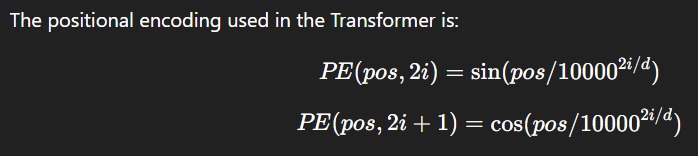

In [3]:
# now we need the position indices which needed to be applied in the formula
position = torch.arange(0, 5, dtype=torch.float32).unsqueeze(1) #here instead of 5 we will take d_model which is the embedding size
print(position)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])


In [4]:
position.shape

torch.Size([5, 1])

In [5]:
#let pe is x here, now inorder to take sine and cosine values 
x = [0, 1, 2, 3, 4, 5]
print(x[0::2]) # to get even positions

[0, 2, 4]


In [6]:
print(x[1::2]) #to get odd positions

[1, 3, 5]


In [7]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_length=5000):
        super(PositionalEncoding, self).__init__()
        # Create a matrix of shape (max_len, d_model)
        pe = torch.zeros(max_length, d_model)
        # Create position indices (0, 1, 2, ..., max_len-1)
        position = torch.arange(0, max_length, dtype=torch.float32).unsqueeze(1) # pos values
        # Compute the division term (different frequencies)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(1000) / d_model))

        # Apply sine to even indices at even and odd positions of pe
        pe[:, 0::2] = torch.sin(position * div_term) # why 0::2 is for sine we will take 2i positions -> 2*0::2*1 --> 0::2 for every two values
        # Apply cosine to odd indices
        pe[:, 1::2] = torch.cos(position * div_term) # why 1::2 is for sine we will take 2i+1 positions -> 2*0+1::2*1 --> 1::2 for every two values

        # Add batch dimension at position 0
        pe = pe.unsqueeze(0)

        # Register as buffer (not a trainable parameter)
        self.register_buffer('pe', pe)

    def forward(self, x): # we need to add this positional embeddings to the word embeddings
        """
        x shape: (batch_size, seq_len, d_model)
        """
        seq_len = x.size(1)
        x = x + self.pe[:, :seq_len]
        return x

In [8]:
d_model = 512
seq_len = 100
batch_size = 32

x = torch.zeros(batch_size, seq_len, d_model)
pe = PositionalEncoding(d_model)
x = pe(x)

print(x.shape)  # (32, 100, 512)

torch.Size([32, 100, 512])


In [9]:
x[0, 1, :]

tensor([0.8415, 0.5403, 0.8268, 0.5625, 0.8119, 0.5837, 0.7970, 0.6040, 0.7819,
        0.6234, 0.7668, 0.6419, 0.7516, 0.6596, 0.7365, 0.6764, 0.7214, 0.6925,
        0.7064, 0.7078, 0.6915, 0.7224, 0.6766, 0.7363, 0.6619, 0.7496, 0.6474,
        0.7622, 0.6330, 0.7742, 0.6187, 0.7856, 0.6047, 0.7965, 0.5908, 0.8068,
        0.5772, 0.8166, 0.5637, 0.8260, 0.5505, 0.8348, 0.5375, 0.8433, 0.5247,
        0.8513, 0.5121, 0.8589, 0.4997, 0.8662, 0.4876, 0.8731, 0.4757, 0.8796,
        0.4641, 0.8858, 0.4527, 0.8917, 0.4415, 0.8973, 0.4305, 0.9026, 0.4198,
        0.9076, 0.4093, 0.9124, 0.3990, 0.9169, 0.3890, 0.9212, 0.3792, 0.9253,
        0.3696, 0.9292, 0.3602, 0.9329, 0.3510, 0.9364, 0.3421, 0.9397, 0.3333,
        0.9428, 0.3248, 0.9458, 0.3164, 0.9486, 0.3083, 0.9513, 0.3003, 0.9538,
        0.2926, 0.9562, 0.2850, 0.9585, 0.2776, 0.9607, 0.2704, 0.9627, 0.2634,
        0.9647, 0.2566, 0.9665, 0.2499, 0.9683, 0.2434, 0.9699, 0.2370, 0.9715,
        0.2308, 0.9730, 0.2248, 0.9744, 

In [10]:
len(x[0, 1, :])

512